In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [72]:
df = pd.read_csv('data/train.csv')
df.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [4]:
df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


In [37]:
print(df.isna().sum())

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [40]:
missing_percentage = (df.isna().sum() / len(df)) * 100
print(missing_percentage)

id                            0.000000
Time_spent_Alone              6.424098
Stage_fear                   10.219175
Social_event_attendance       6.370114
Going_outside                 7.914057
Drained_after_socializing     6.202764
Friends_circle_size           5.689916
Post_frequency                6.823580
Personality                   0.000000
dtype: float64


#### Imputing Missing Values

In [73]:
numerical_features = ['Time_spent_Alone', 'Social_event_attendance',
                    'Going_outside', 'Friends_circle_size', 'Post_frequency']
categorical_features = ['Stage_fear', 'Drained_after_socializing']

for feature in numerical_features:
    df[feature] = df[feature].fillna(df[feature].median())

for feature in categorical_features:
    df[feature] = df[feature].fillna(df[feature].mode()[0])

df.isna().sum()

id                           0
Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18524 entries, 0 to 18523
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         18524 non-null  int64  
 1   Time_spent_Alone           18524 non-null  float64
 2   Stage_fear                 18524 non-null  object 
 3   Social_event_attendance    18524 non-null  float64
 4   Going_outside              18524 non-null  float64
 5   Drained_after_socializing  18524 non-null  object 
 6   Friends_circle_size        18524 non-null  float64
 7   Post_frequency             18524 non-null  float64
 8   Personality                18524 non-null  object 
dtypes: float64(5), int64(1), object(3)
memory usage: 1.3+ MB


In [17]:
target = 'Personality'
num_cols = df.select_dtypes(include='number').columns
num_cols = num_cols.drop('id')
cat_cols = df.select_dtypes(include='object').columns

In [51]:
df.columns

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')

In [56]:
# plt.figure(figsize=(10, 10))
# cols = ['Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
#        'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
#        'Post_frequency']
# sns.pairplot(df[cols], palette='Set2',)

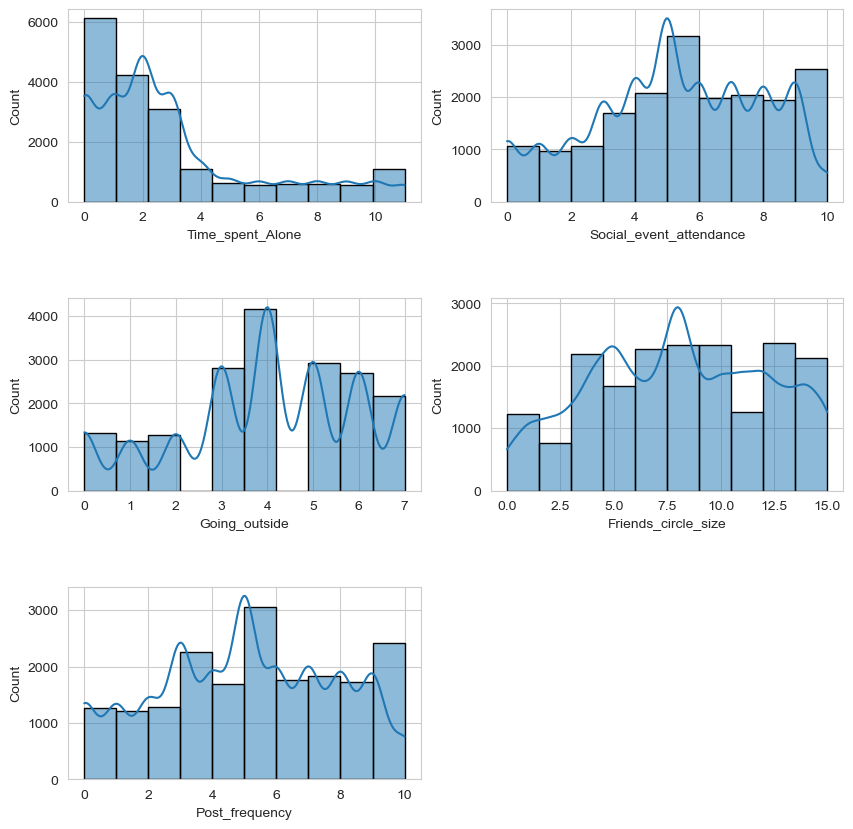

In [75]:
plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col], kde=True, bins=10, edgecolor='black')
    # plt.xticks(rotation=90)
    # plt.title(col)
    # plt.xlabel(, ang)

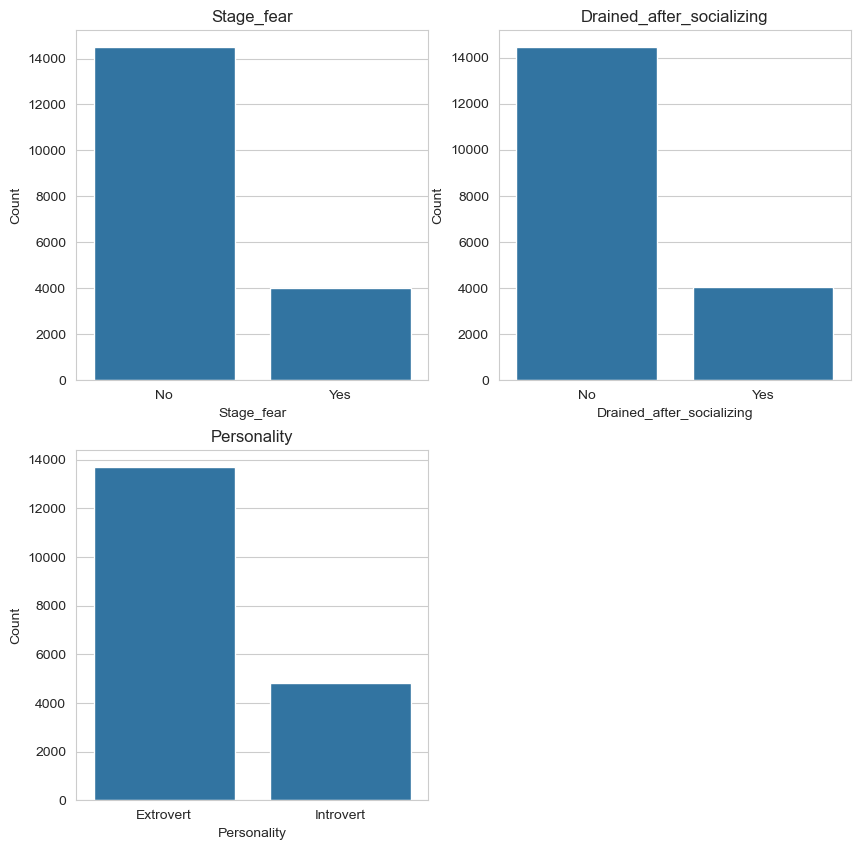

In [76]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 2, i + 1)
    sns.countplot(df, x=col)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Count')
    # plt.xticks(rotation=90)

In [77]:
print(df['Personality'].value_counts())

Personality
Extrovert    13699
Introvert     4825
Name: count, dtype: int64


#### Encoding Categorical Columns

In [78]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [79]:
df['Drained_after_socializing'].value_counts()

Drained_after_socializing
0    14462
1     4062
Name: count, dtype: int64

#### Modelling

In [80]:
from sklearn.model_selection import train_test_split
X = df.drop(['Personality','id'], axis=1)
y = df['Personality']
X_train, X_test, y_train, y_test = train_test_split(df[num_cols], df[target], test_size=0.2, random_state=42)

In [81]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred)}")

[[2690   63]
 [  61  891]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2753
           1       0.93      0.94      0.93       952

    accuracy                           0.97      3705
   macro avg       0.96      0.96      0.96      3705
weighted avg       0.97      0.97      0.97      3705

ROC-AUC Score: 0.9565201216701719


In [82]:
test = pd.read_csv('data/test.csv')
test.head()

,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0


In [83]:
test.isna().sum()

id                             0
Time_spent_Alone             425
Stage_fear                   598
Social_event_attendance      397
Going_outside                466
Drained_after_socializing    432
Friends_circle_size          350
Post_frequency               408
dtype: int64